# Map and reduce

In [2]:
import dask.bag as db

bag = db.from_sequence(['mary', 'had', 'a', 'little', 'lamb'])

Notes / lessons learned 
- see question at the end for the exercise

In [3]:
# Create a function for mapping
def f(x):
    return x.upper()

# Create the map and compute it
bag.map(f).compute()

['MARY', 'HAD', 'A', 'LITTLE', 'LAMB']

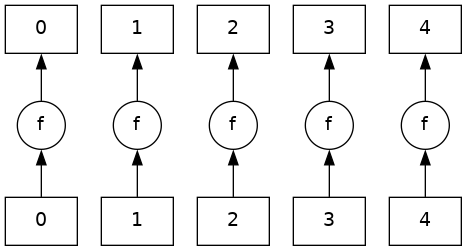

In [4]:
bag.map(f).visualize()

In [5]:
# Return True if x is even, False if not
def pred(x):
    return 'a' in x

bag.filter(pred).compute()

['mary', 'had', 'a', 'lamb']

`filter` vs `map`: `map` returns the output of function `f()` for each input item; `filter` returns only the input items for which the function `f()` evaluates to true.

In [20]:
from dask import bag as db 

data = [
   { "name": "John", "age": 42, "credits": [0, 1, 3] },
   { "name": "Mary", "age": 35, "credits": [3]},
   { "name": "Paul", "age": 78, "credits": [5, 3, 1] },
   { "name": "Julia", "age": 10, "credits": [4, 9] }
]

bag = db.from_sequence(data)

In [26]:
def mypluck(item, key):
    return item[key]

In [22]:
bag.map(mypluck, "credits").compute()

[[0, 1, 3], [3], [5, 3, 1], [4, 9]]

In [29]:
bag.map(mypluck, "credits").map(mypluck, 0).compute()

[0, 3, 5, 4]

#### Computing pi

In [67]:
import numba 
import random 

# @numba.jit(nopython=True, nogil=True) # <-- again, big speed-up
def calc_pi(N):
    M = 0
    for i in range(N):
        # Simulate impact coordinates
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)

        # True if impact happens inside the circle
        if x**2 + y**2 < 1.0:
            M += 1
    return 4 * M / N

def mean(*args):
    return sum(args) / len(args)

Why does this not work?
```python
bag = db.from_sequence([10**6 for _ in range(10)])

pi = bag.reduction(calc_pi, mean)
```

In [68]:
bag = db.from_sequence([10**6 for _ in range(10)])

pi = bag.map(calc_pi).mean()

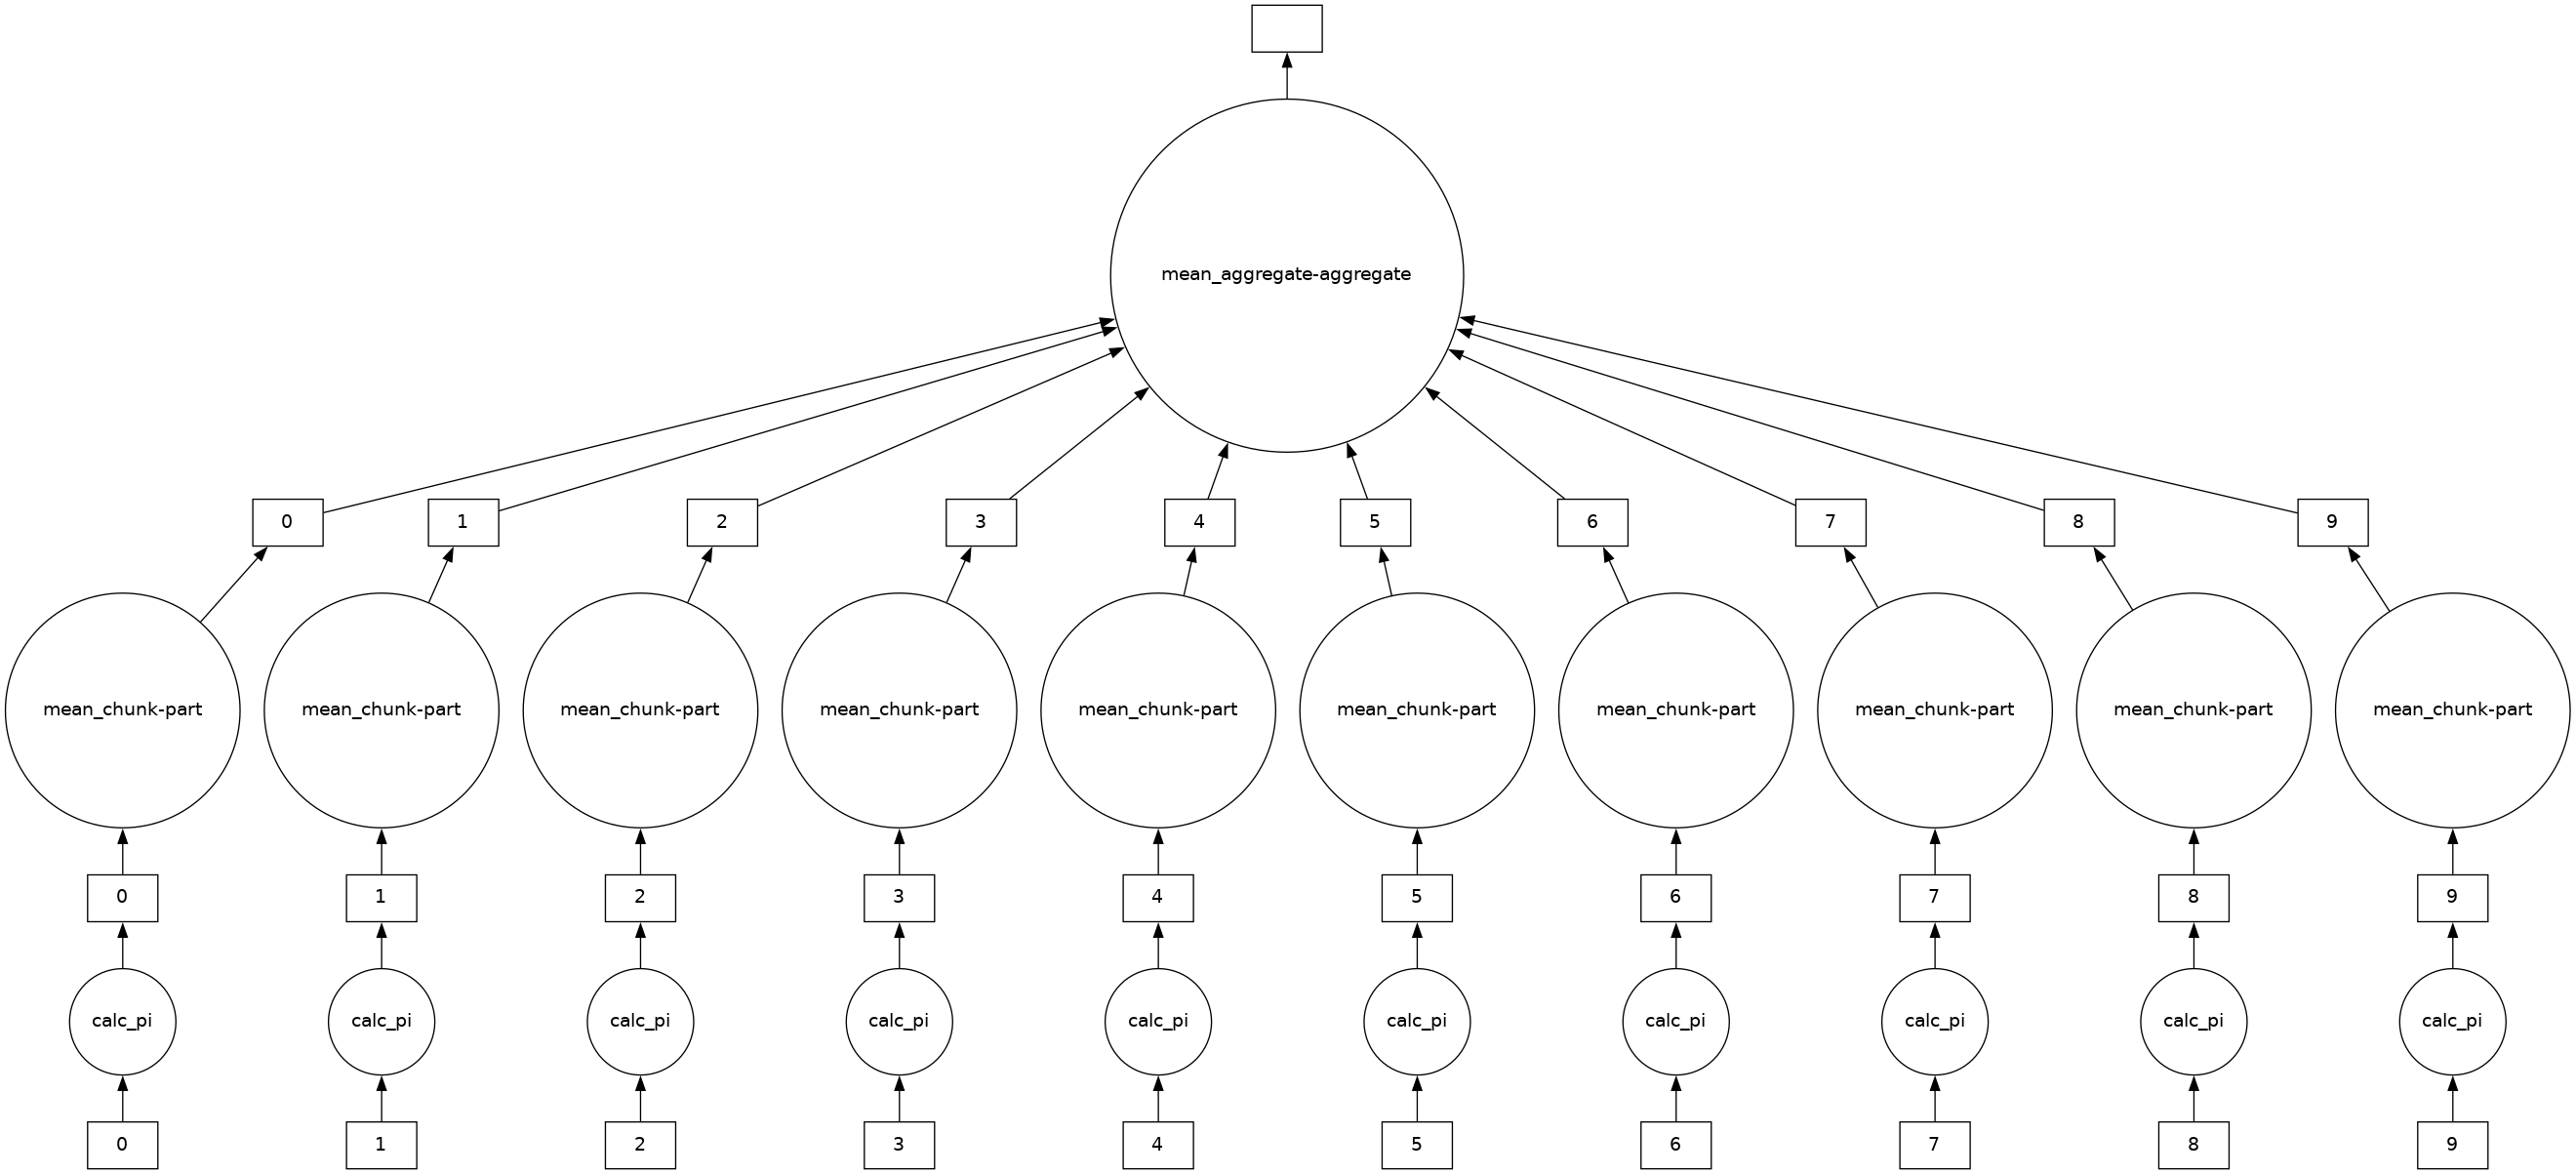

In [69]:
pi.visualize()

In [70]:
# pi.compute()
pi.compute()

3.141806